#     Algorithmic Trading
##     NOVA IMS
####     Carlos Cardoso - 20211220 | Carlota Reis - 20211208 | Guilherme Miranda - 20210420 | Mariana Garcia - 20210838 

## Group Assignment

In [1]:
## Initializations and data loading

In [2]:
# Loading packages

import yfinance as yf
import numpy as np
import pandas as pd
import pandas_ta as ta
import backtrader as bt
import matplotlib.pyplot as plt
import quantstats as qs
import math
from termcolor import colored as cl 

In [3]:
# Loading data of all Assets
A = pd.read_csv(r'C:\Users\lotar\OneDrive - NOVAIMS\4th trimester\Algorithmic Trading\asset_A.csv')
B = pd.read_csv(r'C:\Users\lotar\OneDrive - NOVAIMS\4th trimester\Algorithmic Trading\asset_B.csv')
C = pd.read_csv(r'C:\Users\lotar\OneDrive - NOVAIMS\4th trimester\Algorithmic Trading\asset_C.csv')
D = pd.read_csv(r'C:\Users\lotar\OneDrive - NOVAIMS\4th trimester\Algorithmic Trading\asset_D.csv')
E = pd.read_csv(r'C:\Users\lotar\OneDrive - NOVAIMS\4th trimester\Algorithmic Trading\asset_E.csv')
F = pd.read_csv(r'C:\Users\lotar\OneDrive - NOVAIMS\4th trimester\Algorithmic Trading\asset_F.csv')
G = pd.read_csv(r'C:\Users\lotar\OneDrive - NOVAIMS\4th trimester\Algorithmic Trading\asset_G.csv')
H = pd.read_csv(r'C:\Users\lotar\OneDrive - NOVAIMS\4th trimester\Algorithmic Trading\asset_H.csv')
I = pd.read_csv(r'C:\Users\lotar\OneDrive - NOVAIMS\4th trimester\Algorithmic Trading\asset_I.csv')
J = pd.read_csv(r'C:\Users\lotar\OneDrive - NOVAIMS\4th trimester\Algorithmic Trading\asset_J.csv')
K = pd.read_csv(r'C:\Users\lotar\OneDrive - NOVAIMS\4th trimester\Algorithmic Trading\asset_K.csv')
L = pd.read_csv(r'C:\Users\lotar\OneDrive - NOVAIMS\4th trimester\Algorithmic Trading\asset_L.csv')


### Analyzing time series of assets

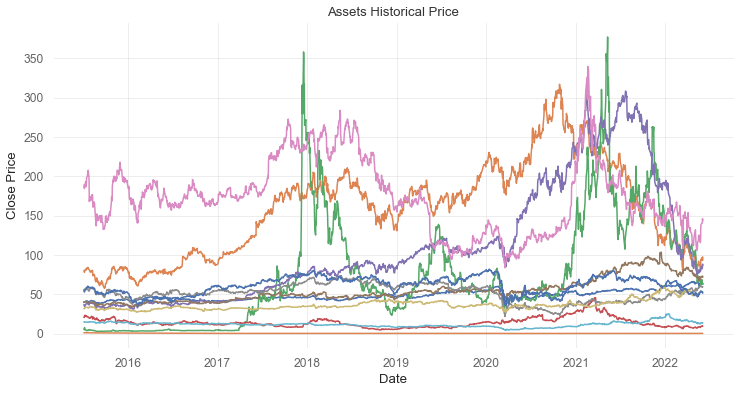

In [4]:
aux = [A,B,C,D,E,F,G,H,I,J,K,L]

plt.figure(figsize=(12.2, 6))
plt.title('Assets Historical Price')
plt.xlabel('Date')
plt.ylabel('Close Price')

for asset in aux:
    asset.set_index(pd.DatetimeIndex(asset["Date"]), inplace=True)
    plt.plot(asset['Close']);

In [5]:
# Calculate all assets Returns (percentage, log and cummulative) and append to the respective DataFrame

for asset in aux:
    asset.set_index(pd.DatetimeIndex(asset["Date"]), inplace=True)  #Setting date as index in Datetime
    asset.ta.log_return(cumulative=True, append=True)
    asset.ta.percent_return(cumulative=True, append=True)
    asset.ta.percent_return(cumulative=False, append=True)
    

#Show all dataframes
for asset in aux:
    print (asset)

                  Date  Adj Close      Close       High        Low       Open  \
Date                                                                            
2015-07-06  2015-07-06  31.672861  39.419998  39.599998  39.220001  39.320000   
2015-07-07  2015-07-07  32.339748  40.250000  40.380001  39.400002  39.490002   
2015-07-08  2015-07-08  32.026394  39.860001  40.230000  39.840000  39.990002   
2015-07-09  2015-07-09  32.074585  39.919998  40.580002  39.900002  40.459999   
2015-07-10  2015-07-10  32.452229  40.389999  40.520000  40.160000  40.270000   
...                ...        ...        ...        ...        ...        ...   
2022-05-27  2022-05-27  64.680000  64.680000  64.830002  64.139999  64.260002   
2022-05-31  2022-05-31  63.380001  63.380001  64.320000  63.049999  64.080002   
2022-06-01  2022-06-01  63.070000  63.070000  63.680000  62.130001  63.419998   
2022-06-02  2022-06-02  63.730000  63.730000  63.740002  62.110001  63.180000   
2022-06-03  2022-06-03  62.9

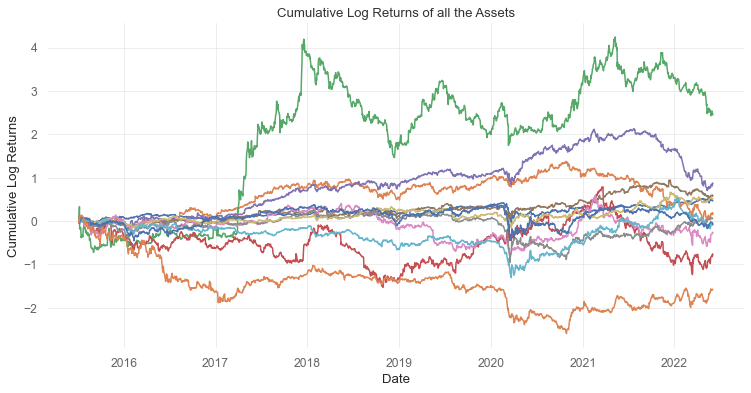

In [6]:
plt.rcParams['figure.figsize'] = (12.5,6)
plt.title('Cumulative Log Returns of all the Assets')
plt.xlabel('Date')
plt.ylabel('Cumulative Log Returns')

#Plotting Cummulative Log Returns
for asset in aux:
    plt.plot(asset['CUMLOGRET_1']);

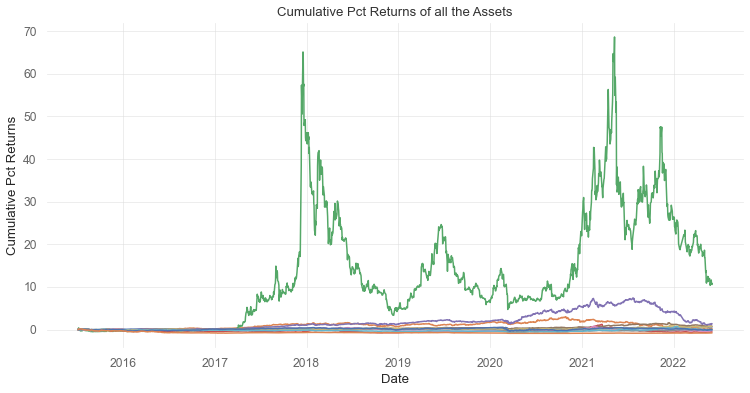

In [7]:
plt.rcParams['figure.figsize'] = (12.5,6)
plt.title('Cumulative Pct Returns of all the Assets')
plt.xlabel('Date')
plt.ylabel('Cumulative Pct Returns')

#Plotting Cummulative Percentage Returns
for asset in aux:
    plt.plot(asset['CUMPCTRET_1']);

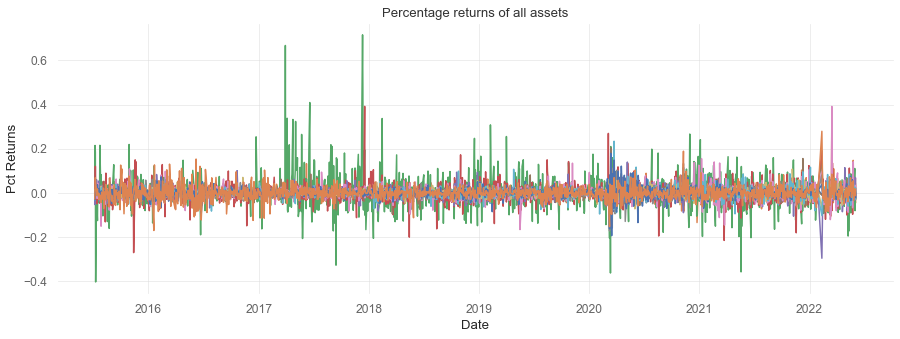

In [8]:
#Plotting Percentage Returns
plt.rcParams['figure.figsize'] = (15,5)
plt.title('Percentage returns of all assets')
plt.xlabel('Date')
plt.ylabel('Pct Returns')


for asset in aux:
    plt.plot(asset['PCTRET_1']);

## Performance Measures and KPIs

In [9]:
#Computing key metrics for each asset
for asset in aux:
    qs.reports.metrics(asset['PCTRET_1'], mode="full")

                           Strategy
-------------------------  ----------
Start Period               2015-07-06
End Period                 2022-06-03
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          59.74%
CAGR﹪                     7.01%

Sharpe                     0.45
Prob. Sharpe Ratio         88.43%
Smart Sharpe               0.45
Sortino                    0.62
Smart Sortino              0.61
Sortino/√2                 0.44
Smart Sortino/√2           0.43
Omega                      1.09

Max Drawdown               -37.54%
Longest DD Days            680
Volatility (ann.)          19.25%
Calmar                     0.19
Skew                       -0.83
Kurtosis                   10.29

Expected Daily %           0.03%
Expected Monthly %         0.56%
Expected Yearly %          6.03%
Kelly Criterion            4.47%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.96%
Expected Shortfall (cVaR)  -1.96%

Max Consecutive Wins     

                           Strategy
-------------------------  ----------
Start Period               2015-07-06
End Period                 2022-06-03
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          135.71%
CAGR﹪                     13.2%

Sharpe                     0.52
Prob. Sharpe Ratio         91.68%
Smart Sharpe               0.48
Sortino                    0.74
Smart Sortino              0.68
Sortino/√2                 0.52
Smart Sortino/√2           0.48
Omega                      1.1

Max Drawdown               -75.92%
Longest DD Days            312
Volatility (ann.)          38.16%
Calmar                     0.17
Skew                       -0.86
Kurtosis                   17.39

Expected Daily %           0.05%
Expected Monthly %         1.03%
Expected Yearly %          11.31%
Kelly Criterion            4.93%
Risk of Ruin               0.0%
Daily Value-at-Risk        -3.87%
Expected Shortfall (cVaR)  -3.87%

Max Consecutive Wins    

                           Strategy
-------------------------  ----------
Start Period               2015-07-06
End Period                 2022-06-03
Risk-Free Rate             0.0%
Time in Market             99.0%

Cumulative Return          68.64%
CAGR﹪                     7.85%

Sharpe                     0.44
Prob. Sharpe Ratio         87.34%
Smart Sharpe               0.41
Sortino                    0.65
Smart Sortino              0.61
Sortino/√2                 0.46
Smart Sortino/√2           0.43
Omega                      1.09

Max Drawdown               -38.37%
Longest DD Days            973
Volatility (ann.)          23.91%
Calmar                     0.2
Skew                       0.28
Kurtosis                   5.98

Expected Daily %           0.03%
Expected Monthly %         0.62%
Expected Yearly %          6.75%
Kelly Criterion            3.98%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.44%
Expected Shortfall (cVaR)  -2.44%

Max Consecutive Wins       10

## Asset C - Technical Indicators

We chose asset C to implement a trading strategy since we thought it would be more interesting to analyze than other due to its increased volatility


In [10]:
asset = C.copy()
asset.set_index(pd.DatetimeIndex(asset["Date"]), inplace=True) #Setting date as index in Datetime
asset = asset.drop('Date', axis = 1) #Date as Index

### We started by analyzing several different trading strategies.

### 1. SMA - Simple Moving Average

Text(0, 0.5, 'Close Price')

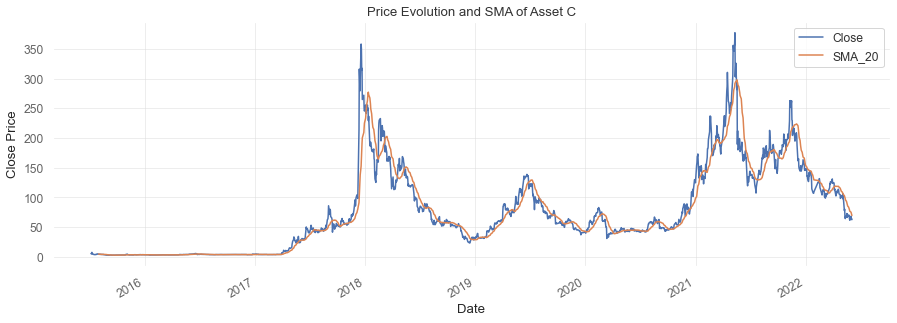

In [11]:
plt.rcParams['figure.figsize'] = (15,5)

asset.ta.sma(length=20, append=True) #20 periods
asset[['Close', 'SMA_20']].plot();

plt.title('Price Evolution and SMA of Asset C')
plt.xlabel('Date')
plt.ylabel('Close Price')

### 2. MACD - Moving Average Convergence Divergence

In [12]:
# Get the 26-day EMA of the closing price
k = asset['Close'].ewm(span=12, adjust=False, min_periods=12).mean()

# Get the 12-day EMA of the closing price
d = asset['Close'].ewm(span=26, adjust=False, min_periods=26).mean()

# Subtract the 26-day EMA from the 12-Day EMA to get the MACD
macd = k - d

# Get the 9-Day EMA of the MACD for the Trigger line
macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()

# Calculate the difference between the MACD - Trigger for the Convergence/Divergence value
macd_h = macd - macd_s

# Add all of our new values for the MACD to the dataframe
asset['macd'] = asset.index.map(macd)
asset['macd_h'] = asset.index.map(macd_h)
asset['macd_s'] = asset.index.map(macd_s)

asset

,Adj Close,Close,High,Low,Open,Volume,CUMLOGRET_1,CUMPCTRET_1,PCTRET_1,SMA_20,macd,macd_h,macd_s
Date,,,,,,,,,,,,,
2015-07-06,5.417230,5.417230,5.690670,4.672240,4.947000,22969200.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2015-07-07,5.234630,5.234630,5.484930,4.899270,5.437070,13570800.0,-0.034288,-0.033707,-0.033707,NaN,NaN,NaN,NaN
2015-07-08,6.361120,6.361120,6.388620,5.139400,5.246780,23234900.0,0.160620,0.174239,0.215200,NaN,NaN,NaN,NaN
2015-07-09,7.536940,7.536940,7.833260,5.995810,6.356450,42419800.0,0.330232,0.391290,0.184845,NaN,NaN,NaN,NaN
2015-07-10,4.505220,4.505220,8.727480,4.068630,7.527010,62612600.0,-0.184348,-0.168354,-0.402248,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,61.563923,61.563923,63.928551,61.287403,63.800579,646210455.0,2.430491,10.364465,-0.035474,76.867530,-10.171313,0.044863,-10.216177
2022-05-31,68.411385,68.411385,69.562752,67.181343,69.110268,532691935.0,2.535955,11.628480,0.111225,75.253438,-9.560662,0.524412,-10.085074
2022-06-01,62.967819,62.967819,70.076424,62.546368,68.417023,754343388.0,2.453039,10.623619,-0.079571,73.434678,-9.407523,0.542041,-9.949564


<AxesSubplot:xlabel='Date'>

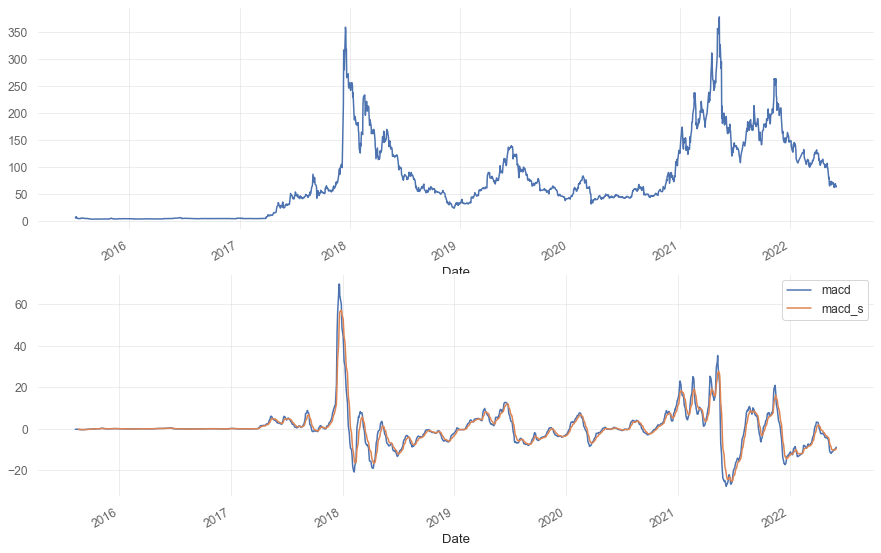

In [13]:
plt.rcParams['figure.figsize'] = (15,10)

fig, (ax1, ax2) = plt.subplots(2, 1)
asset.Close.plot(ax=ax1)
asset[['macd', 'macd_s']].plot(ax=ax2)



### 3. Fibonacci Retracement

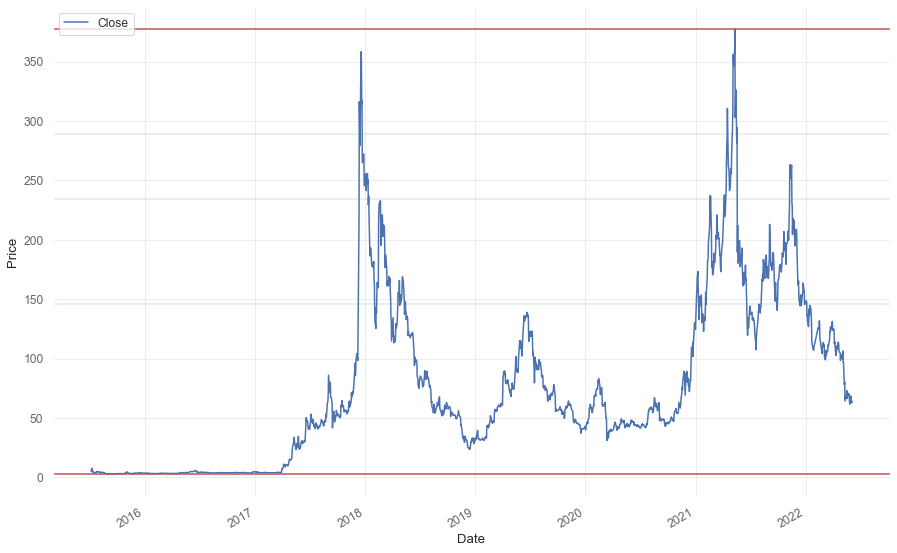

In [14]:
window = asset['Close']
price_min = window.min()
price_max = window.max()

diff = price_max - price_min
level1 = price_max - 0.236 * diff
level2 = price_max - 0.382 * diff
level3 = price_max - 0.618 * diff

ax = window.plot()
points = [
    (price_max, '100%', 'r', 1),
    (level1, '61.8%', 'g', 0.2),
    (level2, '38.2%', 'g', 0.2),
    (level3, '23.6%', 'g', 0.2),
    (price_min, '0%', 'r', 1),
]

for point in points:
    y, name, c, alpha = point
    ax.axhline(y, alpha=alpha, c=c)
    ax.annotate(name, xy=(1,y), xytext=(6,y), color=c, size=14, va="center")

plt.ylabel("Price")
plt.xlabel("Date")
plt.legend(loc=2);

### 4. Momentum Indicators: RSI - Relative Strength Index

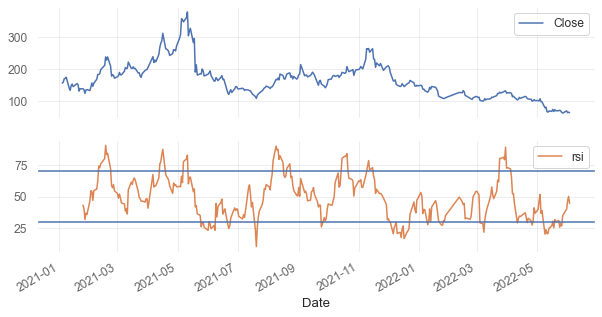

In [15]:
def RSI(serie, period):
    delta = serie.diff()
    up_days = delta.copy()
    up_days[delta <= 0] = 0.0
    down_days = abs(delta.copy())
    down_days[delta > 0] = 0.0
    RS_up = up_days.rolling(period).mean()
    RS_down = down_days.rolling(period).mean()
    return 100 - 100 / (1 + RS_up / RS_down)


df = asset['2021':].copy()
df['rsi'] = RSI(df.Close, 14)
ax1, ax2 = df[['Close', 'rsi']].plot(subplots=True, figsize=(10,5))
ax2.axhline(30)
ax2.axhline(70);

### 5. Volatility Indicators: BB - Bollinger Bands

In [16]:
asset.ta.bbands(append=True)

,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0
Date,,,,,
2015-07-06,NaN,NaN,NaN,NaN,NaN
2015-07-07,NaN,NaN,NaN,NaN,NaN
2015-07-08,NaN,NaN,NaN,NaN,NaN
2015-07-09,NaN,NaN,NaN,NaN,NaN
2015-07-10,3.718409,5.811028,7.903648,72.022347,0.187997
...,...,...,...,...,...
2022-05-27,59.935501,66.607896,73.280292,20.034848,0.122027
2022-05-31,59.973148,66.487622,73.002096,19.596051,0.647653
2022-06-01,59.365503,65.016876,70.668249,17.384326,0.318712


C:\Users\lotar\AppData\Local\Temp\ipykernel_29440\2804474157.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df = asset['2021'].copy()


<AxesSubplot:xlabel='Date'>

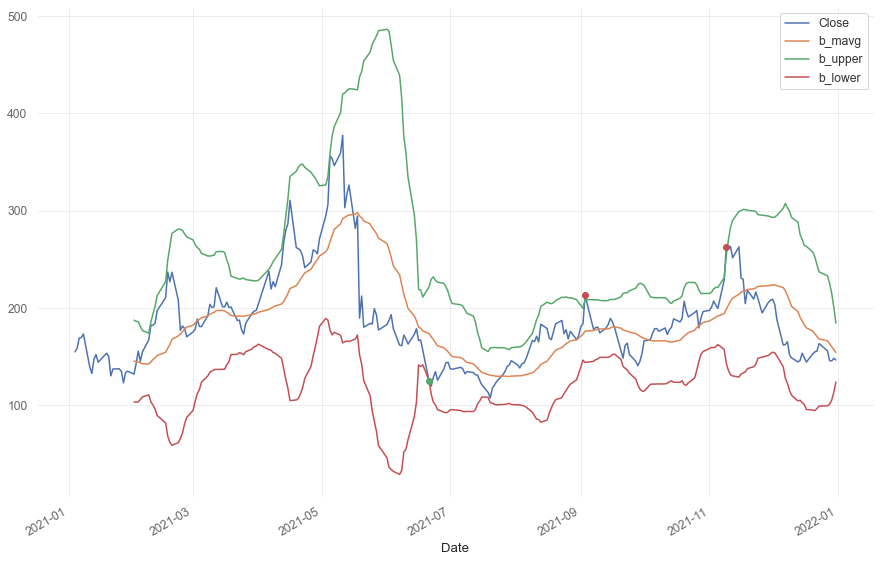

In [17]:
#Selected 2021 as the period of analyzis
df = asset['2021'].copy()

df[['b_lower', 'b_mavg', 'b_upper', 'b_bandwidth', 'b_percent']] = df.ta.bbands(length=20, std=3)
df[['Close', 'b_mavg', 'b_upper', 'b_lower']].plot();
buyers = df[df['Close'] <= df['b_lower']]
sellers = df[df['Close'] >= df['b_upper']]

buyers.Close.plot(c='g', marker='o', linestyle='none')
sellers.Close.plot(c='r', marker='o', linestyle='none')

In [18]:
buyers

,Adj Close,Close,High,Low,Open,Volume,CUMLOGRET_1,CUMPCTRET_1,PCTRET_1,SMA_20,...,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,b_lower,b_mavg,b_upper,b_bandwidth,b_percent
Date,,,,,,,,,,,,,,,,,,,,,
2021-06-21,124.786461,124.786461,155.493225,124.249268,154.971985,2.929287e+09,3.137019,22.035104,-0.201906,173.587117,...,121.958847,158.663231,195.367615,46.267032,0.038519,125.300006,173.587117,221.874229,55.634441,-0.005318


In [19]:
sellers

,Adj Close,Close,High,Low,Open,Volume,CUMLOGRET_1,CUMPCTRET_1,PCTRET_1,SMA_20,...,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,b_lower,b_mavg,b_upper,b_bandwidth,b_percent
Date,,,,,,,,,,,,,,,,,,,,,
2021-09-03,212.965973,212.965973,217.517471,180.107056,183.434875,5.461105e+09,3.671548,38.312706,0.159836,176.227062,...,151.413981,183.327856,215.241732,34.816177,0.964345,143.883064,176.227062,208.571060,36.707186,1.067940
2021-11-09,262.906708,262.906708,274.277527,227.101700,228.876678,7.006561e+09,3.882215,47.531575,0.149589,198.677161,...,172.989194,220.243793,267.498392,42.911175,0.951415,143.058647,198.677161,254.295675,55.988835,1.077412


### 6. Volume Indicators: OBV - On-Balance Volume

Text(0.5, 1.0, 'OBV/OBV_EMA')

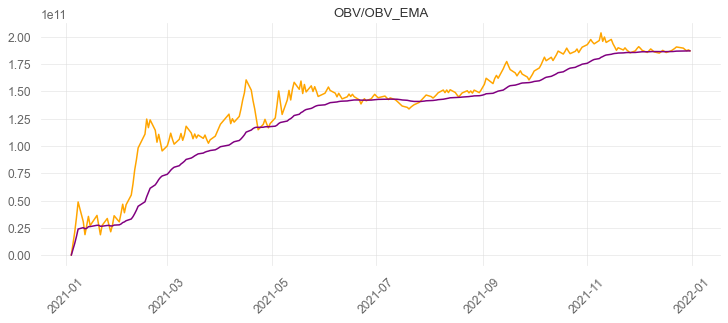

In [20]:
OBV = []
OBV.append(0)
for i in range(1, len(df.Close)):
    if df.Close[i] > df.Close[i-1]: #If the closing price is above the prior close price 
          OBV.append(OBV[-1] + df.Volume[i]) #then: Current OBV = Previous OBV + Current Volume
    elif df.Close[i] < df.Close[i-1]:
          OBV.append( OBV[-1] - df.Volume[i])
    else:
          OBV.append(OBV[-1])
            
df['OBV'] = OBV
df['OBV_EMA'] = df['OBV'].ewm(com=20).mean()


plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( df['OBV'],  label='OBV', color= 'orange')
plt.plot( df['OBV_EMA'],  label='OBV_EMA', color= 'purple')
plt.xticks(rotation=45) 
plt.title('OBV/OBV_EMA')

In [21]:
def buy_sell(signal, col1, col2):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1 #A flag for the trend upward/downward
  #Loop through the length of the data set
  for i in range(0,len(signal)):
    #if OBV > OBV_EMA  and flag != 1 then buy else sell
      if signal[col1][i] > signal[col2][i] and flag != 1:
          sigPriceBuy.append(signal['Close'][i])
          sigPriceSell.append(np.nan)
          flag = 1
      #else  if OBV < OBV_EMA  and flag != 0 then sell else buy
      elif signal[col1][i] < signal[col2][i] and flag != 0:    
          sigPriceSell.append(signal['Close'][i])
          sigPriceBuy.append(np.nan)
          flag = 0
      #else   OBV == OBV_EMA  so append NaN 
      else: 
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)

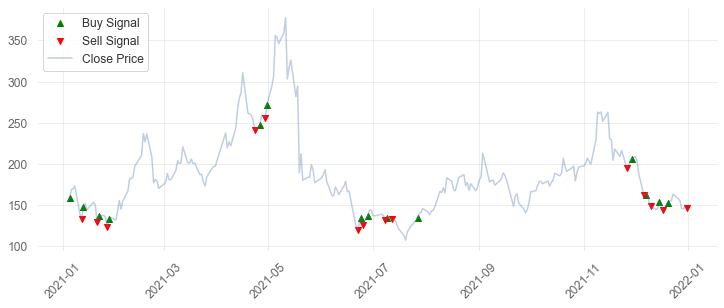

In [22]:
x = buy_sell(df, 'OBV','OBV_EMA' )
df['Buy_Signal_Price'] = x[0]
df['Sell_Signal_Price'] = x[1]
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.scatter(df.index, df['Buy_Signal_Price'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(df.index, df['Sell_Signal_Price'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot( df['Close'],  label='Close Price', alpha = 0.35)
plt.xticks(rotation=45)
plt.legend( loc='upper left')
plt.show()

After analyzing the above strategies and assuming that the market fluctuates around the average of the prices, we decided to apply the Bollinger Bands as our trading strategy taking into account the volatility of the chosen asset.

This strategy measures the “highness” or “lowness” of price, relative to previous trades by providing a range within which the price of an asset typically trades.

BB strategy consists of a centerline and two delimiting bands: an upper and a lower. The centerline of this strategy is a SMA and the price channels are n standard deviations (n = 2 for this project) of the selected asset.

Basically:

Centerline = SMA
Upper Band = SMA + 2 x standard deviation
Lower Band = SMA - 2 x standard deviation


**Trading Rules**:

 **Long**:  - Price closes below the lower band
        - Stop Order: entry when price crosses back above the lower band

 **Short**:
        - Price closes above the upper band
        - Stop order entry when price crosses back below the upper band

 **Exit Critria**
        - Long/Short: Price touching the median line



Starting Portfolio Value: 10000.00
---------------------------- TRADE ---------------------------------
1: Data Name:                            
2: Bar Num:                              54
3: Current date:                         2015-09-18
4: Status:                               Trade Complete
5: Ref:                                  1
6: PnL:                                  -0.81
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            
2: Bar Num:                              75
3: Current date:                         2015-10-19
4: Status:                               Trade Complete
5: Ref:                                  2
6: PnL:                                  1.82
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            
2: Bar Num:

---------------------------- TRADE ---------------------------------
1: Data Name:                            
2: Bar Num:                              1579
3: Current date:                         2021-10-27
4: Status:                               Trade Complete
5: Ref:                                  50
6: PnL:                                  485.62
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            
2: Bar Num:                              1595
3: Current date:                         2021-11-18
4: Status:                               Trade Complete
5: Ref:                                  51
6: PnL:                                  806.28
--------------------------------------------------------------------
---------------------------- TRADE ---------------------------------
1: Data Name:                            
2: Bar Num:                          

<IPython.core.display.Javascript object>


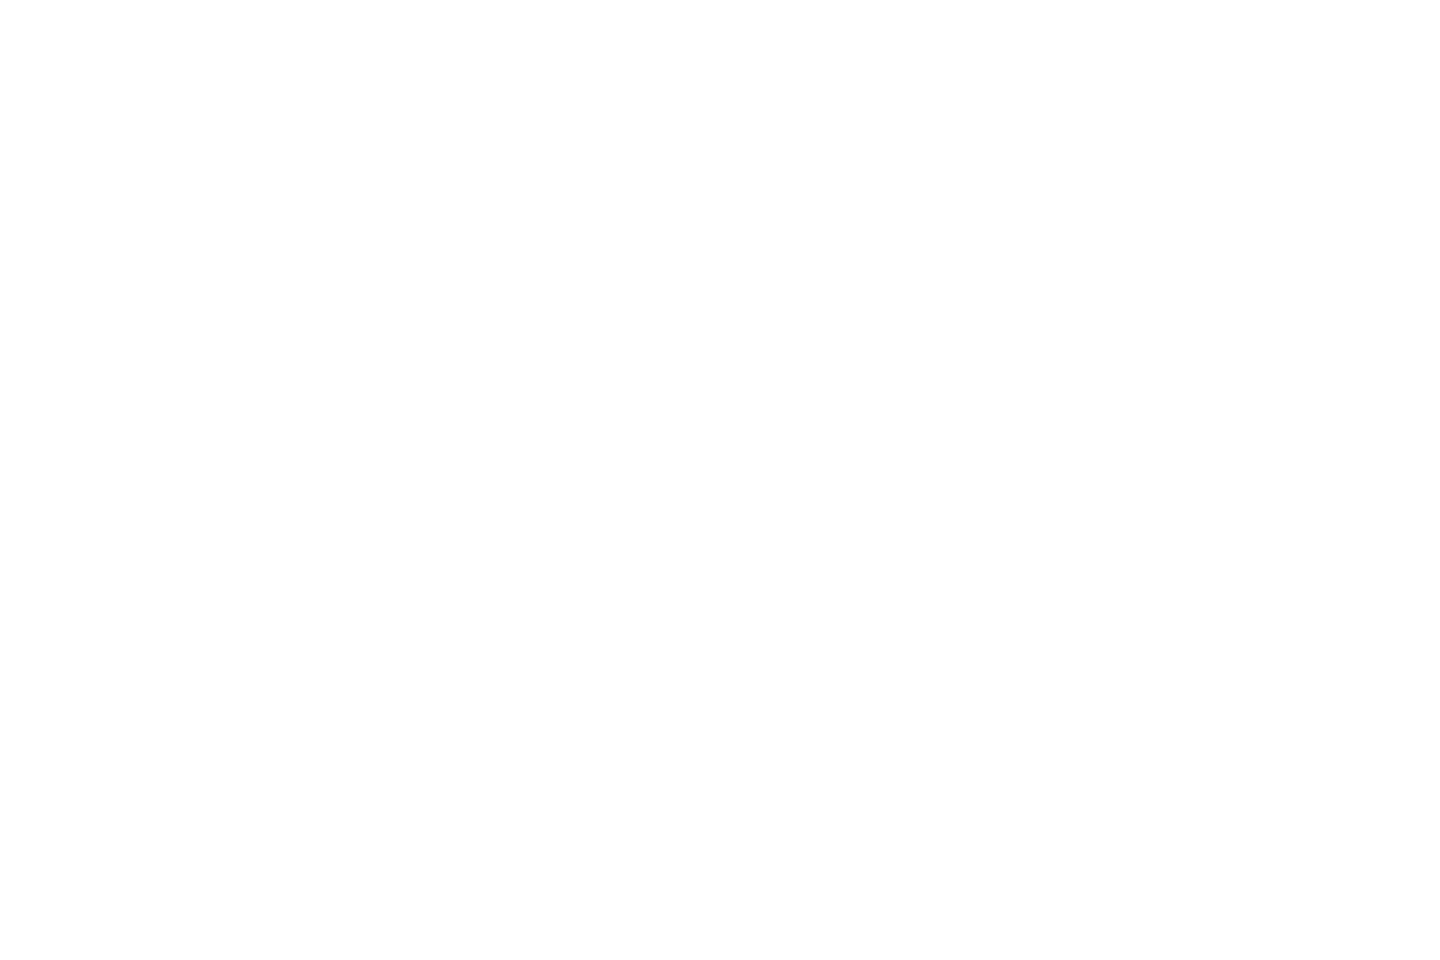

[[<Figure size 1080x720 with 4 Axes>]]

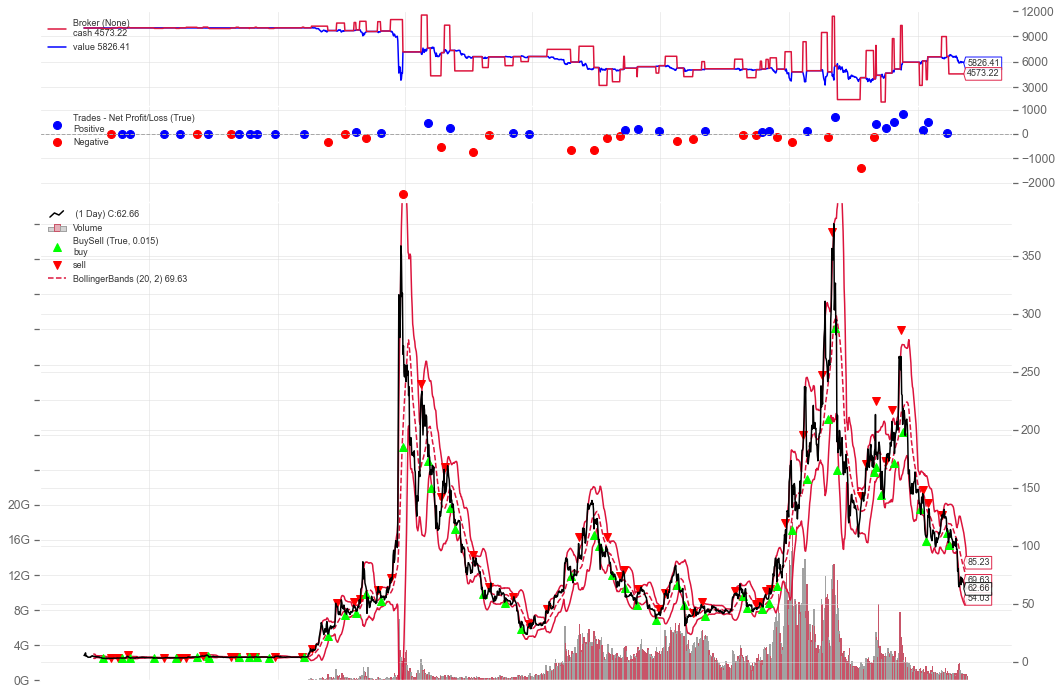

In [23]:
#Backtest
data = asset.filter(['Open','High','Low','Close','Adj Close','Volume'], axis=1) 

from datetime import datetime
 

class BOLLStrat(bt.Strategy):
 
    params = (
        ("period", 20),
        ("devfactor", 2),
        ("size", 20),
        ("debug", False)
        )
 
    def __init__(self):
        self.boll = bt.indicators.BollingerBands(period=self.p.period, devfactor=self.p.devfactor)
 
    def next(self):
 
        orders = self.broker.get_orders_open()
 
        # Cancel open orders so we can track the median line
        if orders:
            for order in orders:
                self.broker.cancel(order)
 
        if not self.position:
 
            if self.data.close > self.boll.lines.top:
 
                self.sell(exectype=bt.Order.Stop, price=self.boll.lines.top[0], size=self.p.size)
 
            if self.data.close < self.boll.lines.bot:
                self.buy(exectype=bt.Order.Stop, price=self.boll.lines.bot[0], size=self.p.size)
 
 
        else:
 
 
            if self.position.size > 0:
                self.sell(exectype=bt.Order.Limit, price=self.boll.lines.mid[0], size=self.p.size)
 
            else:
                self.buy(exectype=bt.Order.Limit, price=self.boll.lines.mid[0], size=self.p.size)
 
    def notify_trade(self,trade):
        if trade.isclosed:
            dt = self.data.datetime.date()
 
            print('---------------------------- TRADE ---------------------------------')
            print("1: Data Name:                            {}".format(trade.data._name))
            print("2: Bar Num:                              {}".format(len(trade.data)))
            print("3: Current date:                         {}".format(dt))
            print('4: Status:                               Trade Complete')
            print('5: Ref:                                  {}'.format(trade.ref))
            print('6: PnL:                                  {}'.format(round(trade.pnl,2)))
            print('--------------------------------------------------------------------')
 
 
cerebro = bt.Cerebro()

btdata = data.copy()
btdata.columns = ['open', 'high', 'low', 'close', 'adj close', 'volume']
btdata = bt.feeds.PandasData(dataname=btdata)
cerebro.adddata(btdata)

cerebro.addstrategy(BOLLStrat)
 
cerebro.broker.setcommission(commission=0.0)
cerebro.addanalyzer(bt.analyzers.Transactions)
cerebro.addanalyzer(bt.analyzers.SharpeRatio, annualize=True)
cerebro.addanalyzer(bt.analyzers.Returns)
cerebro.addanalyzer(bt.analyzers.DrawDown)

#Initial default Portfolio value = 10.000 

print('Starting Portfolio Value: {0:8.2f}'.format(cerebro.broker.getvalue())) 
results = cerebro.run()
print('Final Portfolio Value: {0:8.2f}'.format(cerebro.broker.getvalue()))


print("-"*30)
rnorm = results[0].analyzers.returns.get_analysis().get('rnorm')
print(f'Annualized/Normalized return: {rnorm:.3%}', )
print('Sharpe Ratio: ', results[0].analyzers.sharperatio.get_analysis()['sharperatio'])
print('Max Drawdown:', results[0].analyzers.drawdown.get_analysis()['max']['drawdown'])


trades =  results[0].analyzers.transactions.get_analysis()
columns = ['amount', 'price', 'sid', 'symbol', 'value']
pd.DataFrame([row[0] for row in trades.values()], index=trades.keys(), columns=columns)

cerebro.plot(style='line')

The above strategy backtest produced the following performance measures:

In [24]:
print(f'Annualized/Normalized return: {rnorm:.3%}', )
print('Sharpe Ratio: ', results[0].analyzers.sharperatio.get_analysis()['sharperatio'])
print('Max Drawdown:', results[0].analyzers.drawdown.get_analysis()['max']['drawdown'])

Annualized/Normalized return: -7.609%
Sharpe Ratio:  -0.41869002906068914
Max Drawdown: 67.55416442356274



The negative value of the **Annualized Return** means that if an investor pursued this strategy considering only asset C, it would loose 7.609% per year, regardless of the initial investment.

As for the **Sharpe Ratio** it was observed a value -0.41 which translates a return on the investment smaller than the risk-free rate per additional unit of risk.

Finally, the **Max Drawdown** represents the maximum observed loss of the given period, as a percentage of the peak value. In our strategy the obtained value means that, over the analyzed period, considering the peak value, the portfolio registered a maximum loss of 67.55%.

In [25]:
Total_P_L = -10000 + cerebro.broker.getvalue()
Total_P_L 

-4173.5909815695395

In [26]:
#5.

In [27]:
#Importing the given file and assuming it is in csv format and has the same format as the previous files.

#data = pd.read_csv(r'C:\Users\lotar\OneDrive - NOVAIMS\4th trimester\Algorithmic Trading\asset_A.csv')

data = pd.read_csv('asset.csv')
data.set_index(pd.DatetimeIndex(data["Date"]), inplace=True)

data = data.filter(['Close','High','Low','Open'], axis = 1)

In [28]:
#Calculating the SMA (20 periods)

data['sma_20'] = data.ta.sma(length=20, append=True)

#Defining the Bollinger Bands function (number of stdev = 2)

def bb(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb

data['upper_bb'], data['lower_bb'] = bb(data['Close'], data['sma_20'], 20)

**Trading Rules**:

 **Long**:  - Price closes below the lower band
        - Stop Order: entry when price crosses back above the lower band

 **Short**:
        - Price closes above the upper band
        - Stop order entry when price crosses back below the upper band

 **Exit Critria**
        - Long/Short: Price touching the median line

In [29]:
#Defining Trading strategy 

def implement_bb_strategy(data, lower_bb, upper_bb):
    
    #Empty lists to append the trading strategy values
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]: 
            
            if signal != 1: 
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
                
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            
    return buy_price, sell_price, bb_signal

buy_price, sell_price, bb_signal = implement_bb_strategy(data['Close'], data['lower_bb'], data['upper_bb'])

In [30]:
#Creating Position

#Empty list to append positions taken
position = []

for i in range(len(bb_signal)):
    if bb_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(data['Close'])):
    if bb_signal[i] == 1: #buy stock
        position[i] = 1 #hold stock
    elif bb_signal[i] == -1: #sell stock
        position[i] = 0 #don't own stock
    else:
        position[i] = position[i-1]
        
upper_bb = data['upper_bb']
lower_bb = data['lower_bb']
close_price = data['Close']
bb_signal = pd.DataFrame(bb_signal).rename(columns = {0:'bb_signal'}).set_index(data.index)
position = pd.DataFrame(position).rename(columns = {0:'bb_position'}).set_index(data.index)

frames = [close_price, upper_bb, lower_bb, bb_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)
strategy = strategy.reset_index().drop('Date', axis = 1)

strategy

,Close,upper_bb,lower_bb,bb_signal,bb_position
0,39.419998,NaN,NaN,0,1
1,40.250000,NaN,NaN,0,1
2,39.860001,NaN,NaN,0,1
3,39.919998,NaN,NaN,0,1
4,40.389999,NaN,NaN,0,1
...,...,...,...,...,...
1715,64.680000,67.079405,60.701595,0,1
1716,63.380001,67.078302,60.696699,0,1
1717,63.070000,67.078337,60.695663,0,1
1718,63.730000,66.967949,60.676051,0,1


In [31]:
#Forward strategy P&L

#Calculating returns 
data_ret = pd.DataFrame(np.diff(data['Close'])).rename(columns = {0:'returns'})

#Empty list to append returns gained from BB strategy
bb_strategy_ret = []

for i in range(len(data_ret)):
    try:
        returns = data_ret['returns'][i]*strategy['bb_position'][i]
        bb_strategy_ret.append(returns)
    except:
        pass
    
bb_strategy_ret_df = pd.DataFrame(bb_strategy_ret).rename(columns = {0:'bb_returns'})

investment_value = 10000
number_of_stocks = math.floor(investment_value/data['Close'][-1])
bb_investment_ret = []

for i in range(len(bb_strategy_ret_df['bb_returns'])):
    returns = number_of_stocks*bb_strategy_ret_df['bb_returns'][i]
    bb_investment_ret.append(returns)

bb_investment_ret_df = pd.DataFrame(bb_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(bb_investment_ret_df['investment_returns']), 2)
profit_percentage = math.floor((total_investment_ret/investment_value)*100)


print(('Total PnL from the BB strategy by investing $10k in data : ${}'.format(total_investment_ret)))

yearly_PnL = (asset.index[-1]-asset.index[0]).days/365
print(('Yearly PnL gained from the BB strategy by investing $10k in data : ${}'.format(total_investment_ret/yearly_PnL)))

print(('Profit percentage of the BB strategy : {}%'.format(profit_percentage)))


Total PnL from the BB strategy by investing $10k in data : $4758.96
Yearly PnL gained from the BB strategy by investing $10k in data : $688.2014263074485
Profit percentage of the BB strategy : 47%


In [32]:
#Performance measures

measures_df = pd.DataFrame()
measures_df['returns'] = bb_investment_ret_df/100000
measures_df.loc[-1] = 0
measures_df.index = measures_df.index + 1  # shifting index
measures_df.sort_index(inplace=True)

measures_df['Date'] = data.index
measures_df.set_index(pd.DatetimeIndex(measures_df["Date"]), inplace=True)

measures_df = measures_df.drop('Date', 1)

qs.reports.metrics(measures_df['returns'], mode="full")

C:\Users\lotar\AppData\Local\Temp\ipykernel_29440\1155970930.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  measures_df = measures_df.drop('Date', 1)


                           Strategy
-------------------------  ----------
Start Period               2015-07-06
End Period                 2022-06-03
Risk-Free Rate             0.0%
Time in Market             49.0%

Cumulative Return          4.83%
CAGR﹪                     0.68%

Sharpe                     0.6
Prob. Sharpe Ratio         94.64%
Smart Sharpe               0.59
Sortino                    0.82
Smart Sortino              0.81
Sortino/√2                 0.58
Smart Sortino/√2           0.57
Omega                      1.19

Max Drawdown               -3.33%
Longest DD Days            648
Volatility (ann.)          1.16%
Calmar                     0.21
Skew                       -1.51
Kurtosis                   26.55

Expected Daily %           0.0%
Expected Monthly %         0.06%
Expected Yearly %          0.59%
Kelly Criterion            8.82%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.12%
Expected Shortfall (cVaR)  -0.12%

Max Consecutive Wins       6
Ma